In [2]:
import pandas as pd
import numpy as np
import data_cleanup as dc
import data_exploration as de
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import Documentation as bac
import functions as fun

codons = ['AAA', 'AAC', 'AAG', 'AAU', 'ACA', 'ACC', 'ACG', 'ACU', 'AGA', 'AGC', 'AGG', 'AGU', 'AUA', 'AUC', 'AUG', 'AUU', 'CAA', 'CAC', 'CAG', 'CAU', 'CCA', 'CCC', 'CCG', 'CCU', 'CGA', 'CGC', 'CGG', 'CGU', 'CUA', 'CUC', 'CUG', 'CUU', 'GAA', 'GAC', 'GAG', 'GAU', 'GCA', 'GCC', 'GCG', 'GCU', 'GGA', 'GGC', 'GGG', 'GGU', 'GUA', 'GUC', 'GUG', 'GUU', 'UAA', 'UAC', 'UAG', 'UAU', 'UCA', 'UCC', 'UCG', 'UCU', 'UGA', 'UGC', 'UGG', 'UGU', 'UUA', 'UUC', 'UUG', 'UUU']

# Create an empty dataframe with the custom row and column names
codons_codons = pd.DataFrame(index=codons, columns=codons)

# Fill the dataframe
for row_codon in codons:
    for col_codon in codons:
        differing_bases = sum(row_base != col_base for row_base, col_base in zip(row_codon, col_codon))
        codons_codons.loc[row_codon, col_codon] = differing_bases

codons_codons
#not used until now (20.6.)

,AAA,AAC,AAG,AAU,ACA,ACC,ACG,ACU,AGA,AGC,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
AAA,0,1,1,1,1,2,2,2,1,2,...,3,3,2,3,3,3,2,3,3,3
AAC,1,0,1,1,2,1,2,2,2,1,...,3,3,3,2,3,3,3,2,3,3
AAG,1,1,0,1,2,2,1,2,2,2,...,2,3,3,3,2,3,3,3,2,3
AAU,1,1,1,0,2,2,2,1,2,2,...,3,2,3,3,3,2,3,3,3,2
ACA,1,2,2,2,0,1,1,1,1,2,...,2,2,2,3,3,3,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UGU,3,3,3,2,3,3,3,2,2,2,...,2,1,1,1,1,0,2,2,2,1
UUA,2,3,3,3,2,3,3,3,2,3,...,2,2,1,2,2,2,0,1,1,1
UUC,3,2,3,3,3,2,3,3,3,2,...,2,2,2,1,2,2,1,0,1,1
UUG,3,3,2,3,3,3,2,3,3,3,...,1,2,2,2,1,2,1,1,0,1


In [3]:
aacids = ['K', 'N', 'K', 'N', 'T', 'T', 'T', 'T', 'R', 'S', 'R', 'S', 'I', 'I', 'M', 'I', 'Q', 'H', 'Q', 'H', 'P', 'P', 'P', 'P', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'E', 'D', 'E', 'D', 'A', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'V', 'V', 'V', 'V', 'STOP', 'Y', 'STOP', 'Y', 'S', 'S', 'S', 'S', 'STOP','L', 'F', 'L', 'C', 'W', 'C', 'L']

codons_aacids = pd.DataFrame({'codons': codons, 'aacids': aacids })

codons_aacids
#not used until now (20.6.)

,codons,aacids
0,AAA,K
1,AAC,N
2,AAG,K
3,AAU,N
4,ACA,T
...,...,...
59,UGU,L
60,UUA,C
61,UUC,W
62,UUG,C


In [4]:
dna_sequence = "ATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGCACAGAGGAAGAGAATCTCCGCAAGAAAGGGGAGCCTCACCACGAGCTGCCCCCAGGGAGCACTAAGCGAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCACTGGATGGAGAATATTTCACCCTTCAGATCCGTGGGCGTGAGCGCTTCGAGATGTTCCGAGAGCTGAATGAGGCCTTGGAACTCAAGGATGCCCAGGCTGGGAAGGAGCCAGGGGGGAGCAGGGCTCACTCCAGCCACCTGAAGTCCAAAAAGGGTCAGTCTACCTCCCGCCATAAAAAACTCATGTTCAAGACAGAAGGGCCTGACTCAGAC"
rna_sequence = dna_sequence.replace("T", "U")

In [5]:
p53_codons = [rna_sequence[i:i+3] for i in range(0, len(rna_sequence), 3)]

p53_codons

['AUG',
 'GAG',
 'GAG',
 'CCG',
 'CAG',
 'UCA',
 'GAU',
 'CCU',
 'AGC',
 'GUC',
 'GAG',
 'CCC',
 'CCU',
 'CUG',
 'AGU',
 'CAG',
 'GAA',
 'ACA',
 'UUU',
 'UCA',
 'GAC',
 'CUA',
 'UGG',
 'AAA',
 'CUA',
 'CUU',
 'CCU',
 'GAA',
 'AAC',
 'AAC',
 'GUU',
 'CUG',
 'UCC',
 'CCC',
 'UUG',
 'CCG',
 'UCC',
 'CAA',
 'GCA',
 'AUG',
 'GAU',
 'GAU',
 'UUG',
 'AUG',
 'CUG',
 'UCC',
 'CCG',
 'GAC',
 'GAU',
 'AUU',
 'GAA',
 'CAA',
 'UGG',
 'UUC',
 'ACU',
 'GAA',
 'GAC',
 'CCA',
 'GGU',
 'CCA',
 'GAU',
 'GAA',
 'GCU',
 'CCC',
 'AGA',
 'AUG',
 'CCA',
 'GAG',
 'GCU',
 'GCU',
 'CCC',
 'CCC',
 'GUG',
 'GCC',
 'CCU',
 'GCA',
 'CCA',
 'GCA',
 'GCU',
 'CCU',
 'ACA',
 'CCG',
 'GCG',
 'GCC',
 'CCU',
 'GCA',
 'CCA',
 'GCC',
 'CCC',
 'UCC',
 'UGG',
 'CCC',
 'CUG',
 'UCA',
 'UCU',
 'UCU',
 'GUC',
 'CCU',
 'UCC',
 'CAG',
 'AAA',
 'ACC',
 'UAC',
 'CAG',
 'GGC',
 'AGC',
 'UAC',
 'GGU',
 'UUC',
 'CGU',
 'CUG',
 'GGC',
 'UUC',
 'UUG',
 'CAU',
 'UCU',
 'GGG',
 'ACA',
 'GCC',
 'AAG',
 'UCU',
 'GUG',
 'ACU',
 'UGC',
 'ACG',


In [6]:
#Die RNA Sequenz wird in Codons geslicet und als Liste in p53_codons gespeichert.

In [7]:
# Alle möglichen Codons für tp53
mutated_p53 = de.generate_codon_variations(p53_codons)
mutated_p53

,Original,Variation 1,Variation 2,Variation 3,Variation 4,Variation 5,Variation 6,Variation 7,Variation 8,Variation 9
0,AUG,UUG,GUG,CUG,AAG,AGG,ACG,AUA,AUU,AUC
1,GAG,AAG,UAG,CAG,GUG,GGG,GCG,GAA,GAU,GAC
2,GAG,AAG,UAG,CAG,GUG,GGG,GCG,GAA,GAU,GAC
3,CCG,ACG,UCG,GCG,CAG,CUG,CGG,CCA,CCU,CCC
4,CAG,AAG,UAG,GAG,CUG,CGG,CCG,CAA,CAU,CAC
...,...,...,...,...,...,...,...,...,...,...
388,GGG,AGG,UGG,CGG,GAG,GUG,GCG,GGA,GGU,GGC
389,CCU,ACU,UCU,GCU,CAU,CUU,CGU,CCA,CCG,CCC
390,GAC,AAC,UAC,CAC,GUC,GGC,GCC,GAA,GAU,GAG
391,UCA,ACA,GCA,CCA,UAA,UUA,UGA,UCU,UCG,UCC


In [8]:
# Übersetzen aller möglichen Codons
aa = de.translate_codons_df(mutated_p53).astype(str)
de.prob_as_position(0, aa)

0
I    0.3
L    0.2
M    0.1
V    0.1
K    0.1
R    0.1
T    0.1
Name: proportion, dtype: float64

In [9]:
## Das DMS_score df soll in ein df umgewandelt werden, indem nur die single mutations drinstehen. In dieser Zelle probiere ich das erst einmal für eine Zeile, bevor ich über alle iteriere.

#load DMS_scores
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
df = dc.df_transform_inverse(gia_null_eto)

#modify "aa", so that all "*" values are eliminated and so that the original aminoacid is cut off
aa_cleaned = aa.replace('*', np.nan).iloc[:, 1:]


#position
x=0

# get single mutated AAs
mut_per_pos = de.prob_as_position(x,aa_cleaned).index

# select single mutations out of all DMS_score mutations
selected_columns = df.loc[x+1,mut_per_pos]

selected_columns

,I,L,V,K,R,T
AS_old,,,,,,
M,-1.370065,-2.032227,-0.669727,-0.189807,-1.470598,-0.380537


In [10]:
# use the example for one row to iterate it over the whole length of the protein
de.select_smut(gia_null_eto,aa)

,I,L,V,K,R,T,D,Q,G,A,E,P,S,H,N,Y,C,F,M,W
0,-1.370065,-2.032227,-0.669727,-0.189807,-1.470598,-0.380537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.281564,0.343821,NaN,NaN,0.180007,0.121747,-1.136268,-0.376597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.296231,0.301952,NaN,NaN,0.223665,0.188514,-1.231009,-0.178116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.356359,NaN,NaN,0.416459,0.338175,NaN,0.537396,NaN,-1.175946,NaN,NaN,0.254247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.572254,NaN,0.619942,-0.061831,NaN,NaN,NaN,NaN,NaN,0.154363,0.073229,NaN,0.473020,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,NaN,NaN,0.594617,NaN,0.839858,NaN,NaN,NaN,NaN,1.169208,0.524010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.785431
389,NaN,0.954111,NaN,NaN,1.230978,0.956299,NaN,NaN,NaN,1.478115,NaN,NaN,0.449391,0.754332,NaN,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,1.267699,NaN,NaN,NaN,NaN,NaN,0.805634,1.036380,1.057979,NaN,NaN,0.979709,0.782523,0.855120,NaN,NaN,NaN,NaN
391,NaN,0.772713,NaN,NaN,NaN,0.838674,NaN,NaN,NaN,0.542344,NaN,1.011379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
heatmap_aa: pd.DataFrame = de.select_smut(gia_null_eto,aa)
heatmap_aa.head(20)


,I,L,V,K,R,T,D,Q,G,A,E,P,S,H,N,Y,C,F,M,W
0,-1.370065,-2.032227,-0.669727,-0.189807,-1.470598,-0.380537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.281564,0.343821,NaN,NaN,0.180007,0.121747,-1.136268,-0.376597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.296231,0.301952,NaN,NaN,0.223665,0.188514,-1.231009,-0.178116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.356359,NaN,NaN,0.416459,0.338175,NaN,0.537396,NaN,-1.175946,NaN,NaN,0.254247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.572254,NaN,0.619942,-0.061831,NaN,NaN,NaN,NaN,NaN,0.154363,0.073229,NaN,0.473020,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.083633,NaN,NaN,NaN,0.316212,NaN,NaN,NaN,-0.733648,NaN,0.390291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.247409,NaN,NaN,NaN,NaN,NaN,0.042125,0.577294,0.437353,NaN,NaN,0.512018,0.163652,0.243801,NaN,NaN,NaN,NaN
7,NaN,-0.007909,NaN,NaN,0.516571,0.311746,NaN,NaN,NaN,0.057062,NaN,NaN,-1.320231,0.386434,NaN,NaN,NaN,NaN,NaN,NaN
8,0.306439,NaN,NaN,NaN,0.383002,-0.113804,NaN,NaN,0.149293,NaN,NaN,NaN,NaN,NaN,0.476720,NaN,0.059489,NaN,NaN,NaN
9,0.494835,0.158722,NaN,NaN,NaN,NaN,0.951393,NaN,0.477052,0.505744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.631839,NaN,NaN


In [12]:
heatmap_aa_T = heatmap_aa.transpose()

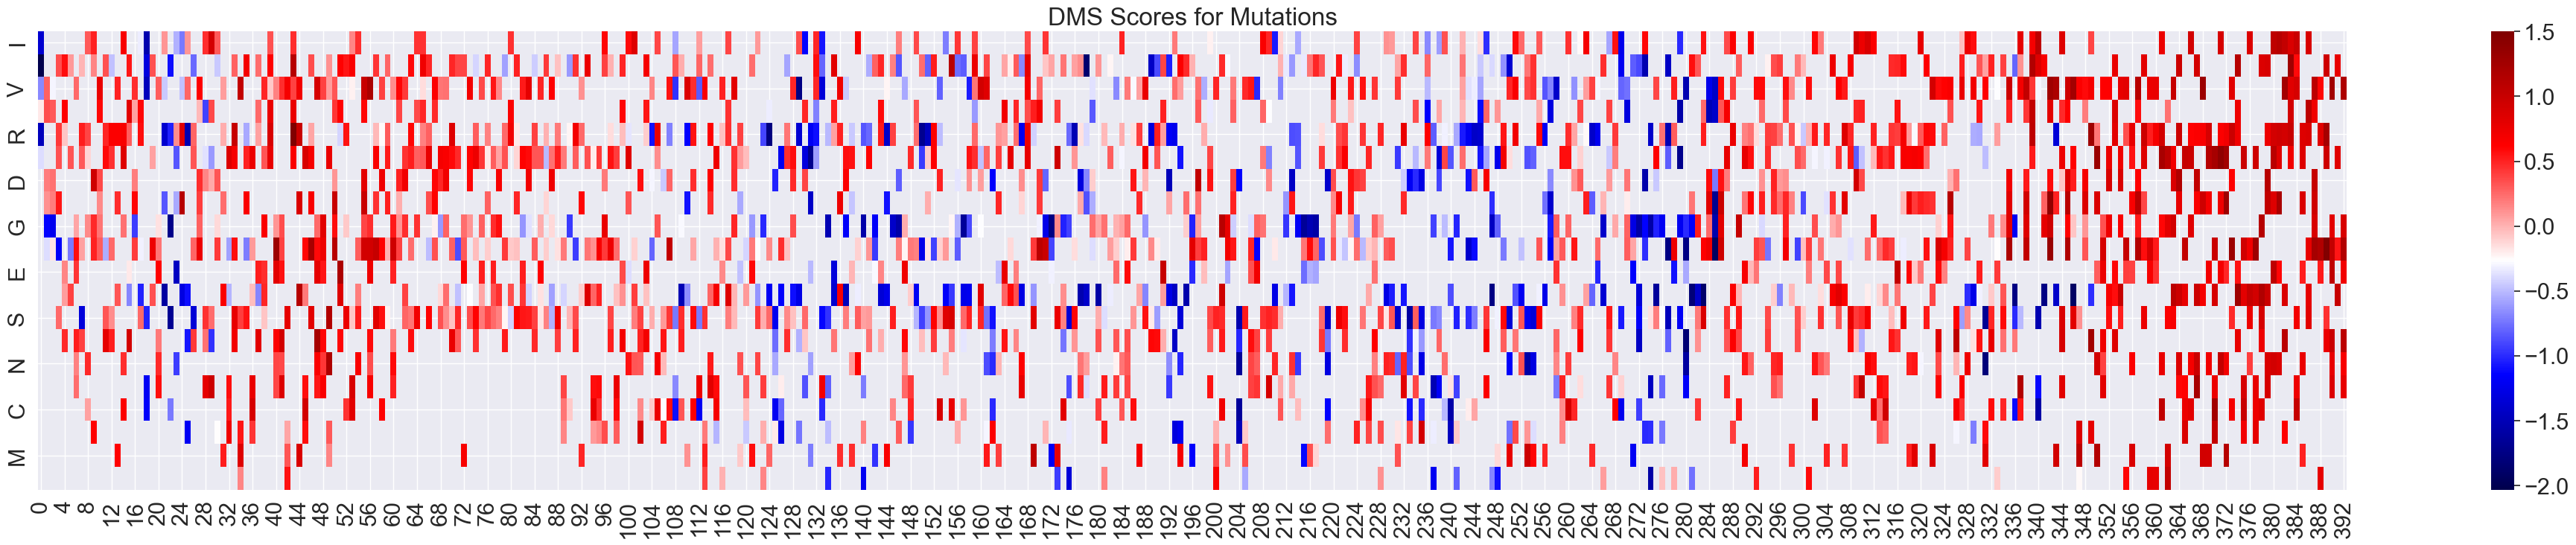

In [13]:
plt.figure(figsize=(50, 8))
sns.set(font_scale=2)
sns.heatmap(heatmap_aa_T, cmap='seismic')
plt.title('DMS Scores for Mutations')
plt.show()

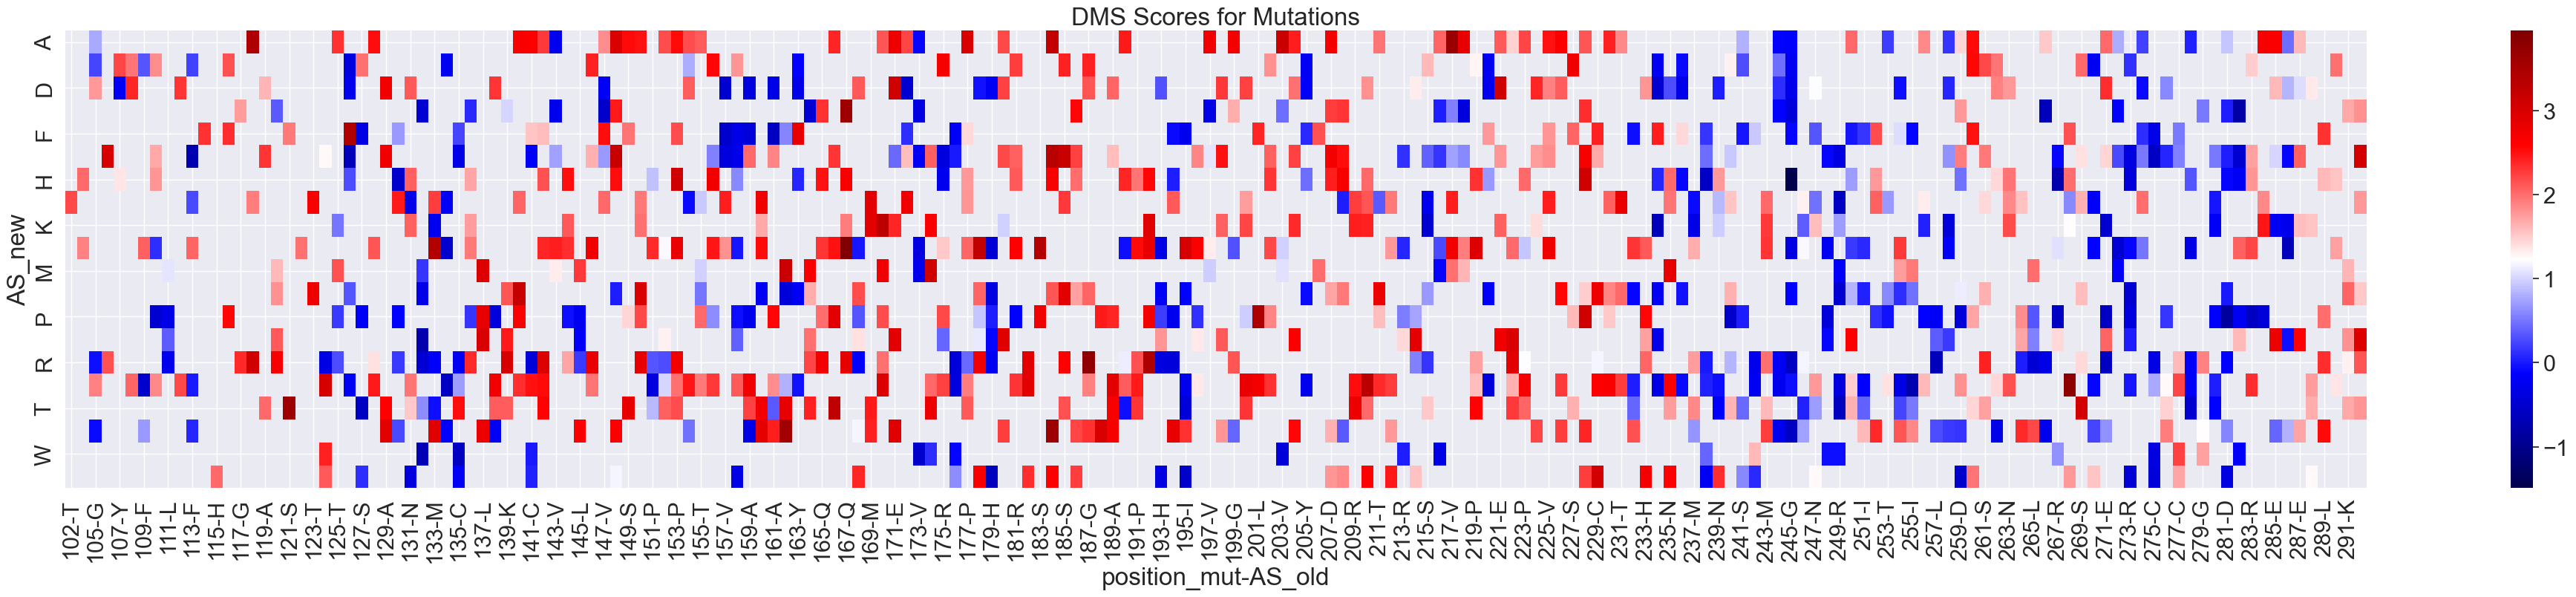

In [14]:
fun.hmap(bac.kot_hum)

In [15]:
heatmap_aa_T_mmn: pd.DataFrame = dc.min_max_norm(heatmap_aa_T)

In [16]:
print(heatmap_aa_T)


        0         1         2         3         4         5         6     
I -1.370065       NaN       NaN       NaN       NaN       NaN       NaN  \
L -2.032227       NaN       NaN  0.356359  0.572254  0.083633       NaN   
V -0.669727  0.281564 -0.296231       NaN       NaN       NaN  0.247409   
K -0.189807  0.343821  0.301952       NaN  0.619942       NaN       NaN   
R -1.470598       NaN       NaN  0.416459 -0.061831       NaN       NaN   
T -0.380537       NaN       NaN  0.338175       NaN  0.316212       NaN   
D       NaN  0.180007  0.223665       NaN       NaN       NaN       NaN   
Q       NaN  0.121747  0.188514  0.537396       NaN       NaN       NaN   
G       NaN -1.136268 -1.231009       NaN       NaN       NaN  0.042125   
A       NaN -0.376597 -0.178116 -1.175946       NaN -0.733648  0.577294   
E       NaN       NaN       NaN       NaN  0.154363       NaN  0.437353   
P       NaN       NaN       NaN       NaN  0.073229  0.390291       NaN   
S       NaN       NaN    

In [22]:
kot_hum_df: pd.DataFrame = dc.df_transform(bac.kot_hum)

In [23]:
kot_hum_mmn: pd.DataFrame = dc.min_max_norm(kot_hum_df)

In [29]:
kot_hum_mmn_mean = kot_hum_mmn.mean()

In [30]:
heatmap_aa_T_mmn_mean = heatmap_aa_T_mmn.mean()


In [32]:
kot_hum_mmn_mean.head(20)

position_mut  AS_old
102           T              NaN
104           Q         0.000000
105           G        -0.145216
106           S         0.000000
107           Y         0.095521
108           G        -0.178635
109           F        -0.106341
110           R         0.376791
111           L        -0.248470
112           G         0.000000
113           F        -0.252627
114           L              NaN
115           H              NaN
116           S        -0.013732
117           G         0.000000
118           T         0.181486
119           A         0.051517
120           K         0.168836
121           S         0.000000
122           V              NaN
dtype: float64

In [35]:
heatmap_aa_T_mmn_mean.head(29)

0     0.100075
1     0.403492
2     0.390518
3     0.514072
4     0.076587
5     0.330624
6     0.029729
7     0.427310
8     0.097309
9    -0.046577
10   -0.191876
11    0.311475
12    0.306912
13    0.186030
14    0.156502
15    0.211803
16    0.390446
17    0.216701
18    0.000975
19   -0.099399
20    0.228612
21   -0.101195
22   -0.051208
23   -0.055742
24   -0.017211
25   -0.140041
26    0.364798
27    0.140235
28    0.204407
dtype: float64

In [36]:
kot_hum_mmn_mean.name = 'kot_hum'
heatmap_aa_T_mmn_mean.name = 'heatmap_AA'

dataframes=[kot_hum_mmn_mean, heatmap_aa_T_mmn_mean]
# figsize kann verändert werden je nach Präferenz
plt.figure(figsize=(40, 6))
# for-loop der jeden Eintrag in der Liste "Dataframes" durchgeht
for df in dataframes:
    # Werte für x-Achse aus 'position_mut' als int extrahiert
    x = df.columns.get_level_values('position_mut').astype(int)
    # Werte für y-Achse aus erster Zeile von df als float extrahiert
    y = df.iloc[0].values.astype(float)
    label = df.name
    plt.plot(x, y, label=label, marker='o')
plt.xlabel('position')
plt.ylabel('DMS_score')
plt.title('Mean DMS_scores of different datasets throughout each position of tp53')
#WARUM ZUR VERDAMMTEN HÖLLE MACHT ER NUR 102 BIS 292 ICH VERSTEHE ES NICHT BITTE BEENDE ES
plt.xticks(np.arange(0, 393+1, 10))
plt.legend()
plt.show()
#plt.plot(x[::10], y[::10], label=label, marker='o')

AttributeError: 'Series' object has no attribute 'columns'

<Figure size 4000x600 with 0 Axes>